<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/restructuration-finale/module-6/Exercices/6_3_solution_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Les statistiques et la science des données appliquées
##Exercice 3
###Solutionnaire

In [ ]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)
install.packages("descr")
require(descr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘Deriv’


Loading required package: rsq

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Loading required package: descr



In [ ]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Exercices/7-3_donnees.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd" + identification des données manquantes

bd #Lecture des données (ignorez le message d'erreur, tant que la base de données s'affiche éventuellement)

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  id = col_double(),
  ses = col_double(),
  genre = col_double(),
  reseau = col_double(),
  scolarite = col_double(),
  experience = col_double()
)




X1,id,ses,genre,reseau,scolarite,experience
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,62.50000,2,24,2,6
2,5,17.10000,2,10,0,1
3,6,69.20000,2,13,3,12
4,7,29.80000,1,4,0,4
5,8,37.70000,2,24,1,4
6,9,37.70000,2,6,1,6
7,10,47.85451,2,14,2,9
8,11,92.30000,2,9,4,27
9,12,80.90000,2,5,4,14


A) Effectuez une régression simple visant à déterminer si le genre peut prédire le statut socioéconomique. Utilisez les femmes comme catégorie de référence.

In [ ]:
#Identification des genres (ajout d'étiquettes)

bd$genre <- factor(bd$genre,
levels = c(1,2),
labels = c("Homme", "Femme")) 

,Frequency,Percent
Homme,1285,44.24931
Femme,1619,55.75069
Total,2904,100.00000


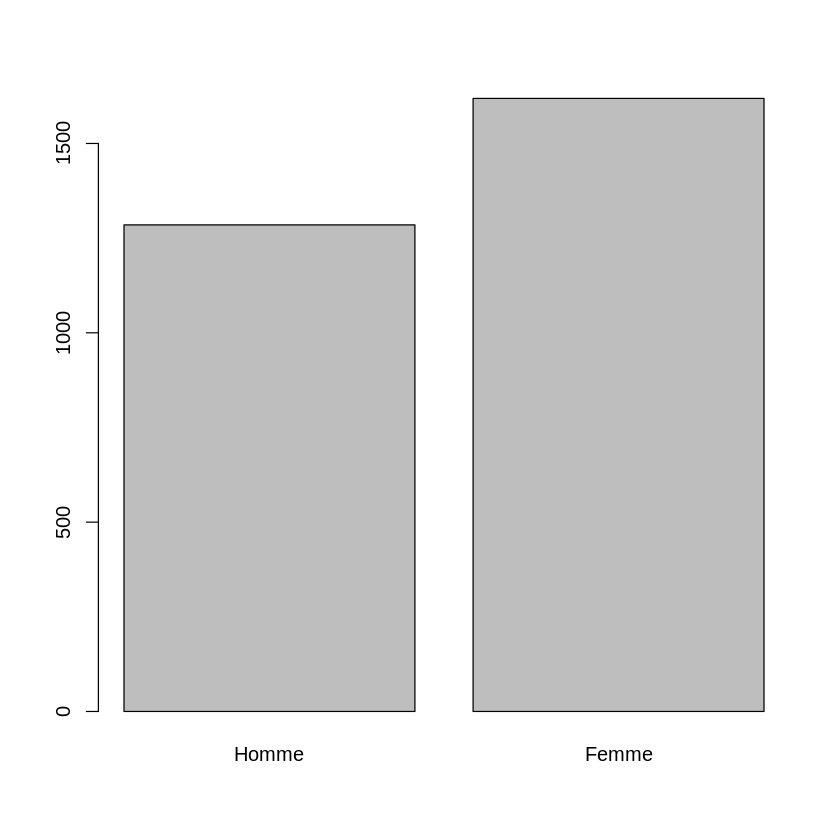

In [ ]:
#Fréquences et distribution VI

freq(bd$genre)

In [ ]:
#Statistiques descriptives VD

summary(bd$ses)
sd(bd$ses)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.10   32.40   40.20   47.85   63.50   97.20 

[1] 18.58611

[1] 18.58611

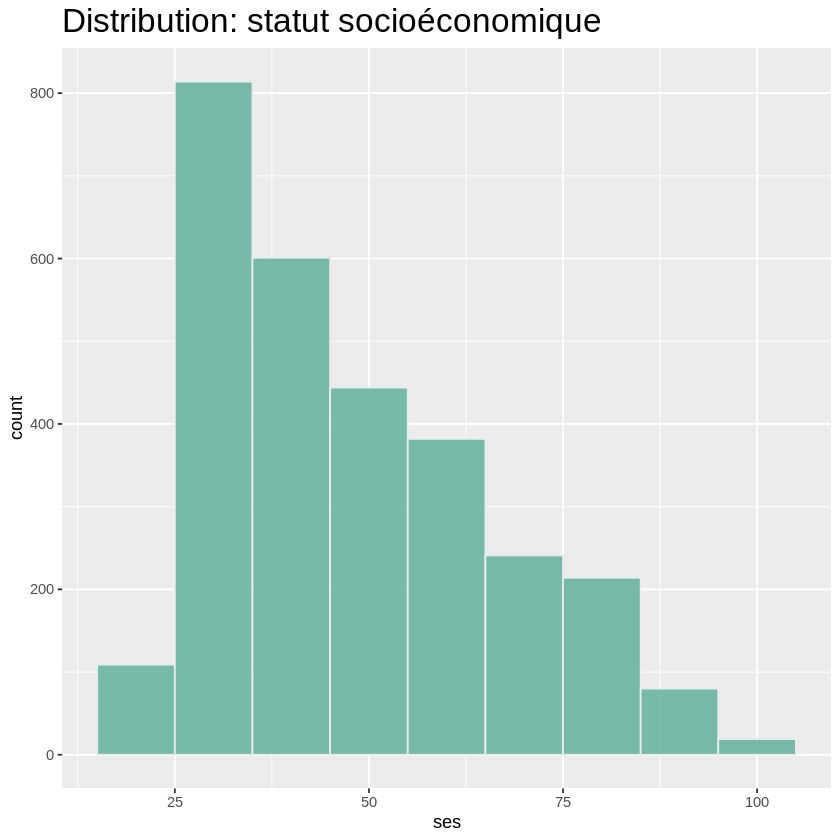

In [ ]:
#Distribution VD statut socioéconomique

ggplot(bd, aes(x=ses)) +
  geom_histogram(binwidth=10, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: statut socioéconomique") +
    theme(
      plot.title = element_text(size=20)
    )

In [ ]:
reglineaire <- glm(ses ~ genre, data = bd, family="gaussian")
summary(rstandard(reglineaire))
summary(reglineaire)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7065 -0.8177 -0.3755  0.0000  0.7930  2.6975 


Call:
glm(formula = ses ~ genre, family = "gaussian", data = bd)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-31.679  -15.179   -6.971   14.721   50.079  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  48.7791     0.5181   94.16   <2e-16 ***
genreFemme   -1.6585     0.6938   -2.39   0.0169 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 344.8836)

    Null deviance: 1002823  on 2903  degrees of freedom
Residual deviance: 1000852  on 2902  degrees of freedom
AIC: 25214

Number of Fisher Scoring iterations: 2


B) Effectuez une régression simple visant à déterminer si le niveau de scolarité peut prédire le statut socioéconomique.

In [ ]:
#Identification des niveaux de scolarité 1 à 4 (ajout d'étiquettes)

bd$scolarite <- factor(bd$scolarite,
levels = c(0,1,2,3,4),
labels = c("Secondaire non terminé", "Secondaire", "Collégial", "Universitaire 1er cycle", "Universitaire études supérieures")) 

,Frequency,Percent
Secondaire non terminé,542,18.663912
Secondaire,930,32.024793
Collégial,677,23.312672
Universitaire 1er cycle,507,17.458678
Universitaire études supérieures,248,8.539945
Total,2904,100.000000


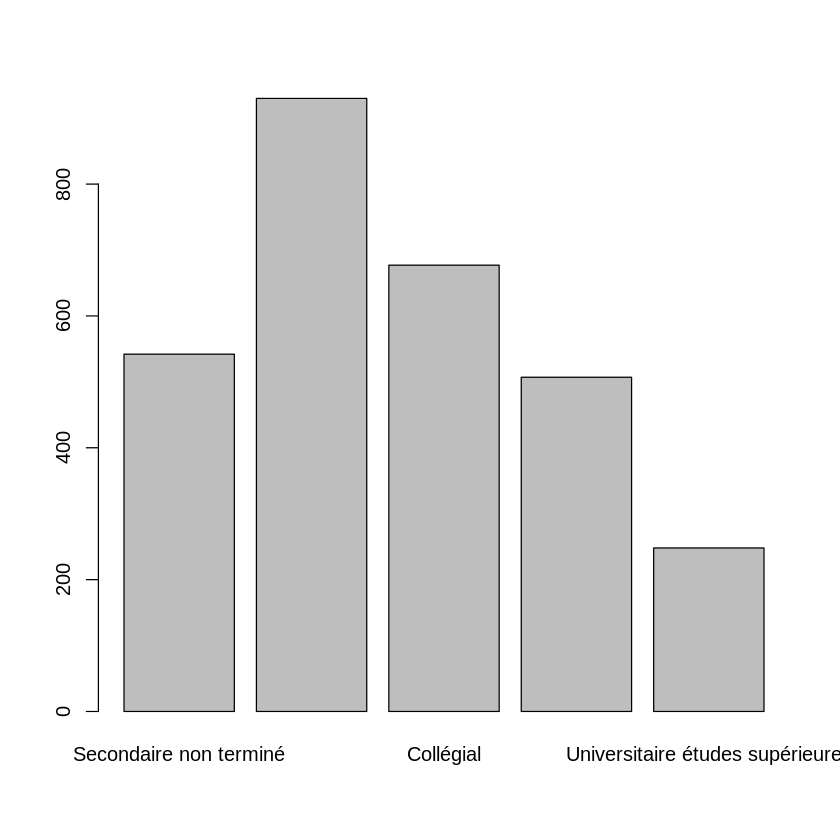

In [ ]:
#Fréquences et distribution VI

freq(bd$scolarite)

In [ ]:
#Statistiques descriptives VD + histogramme

#Voir exercice A

In [ ]:
#Création des variables factices
bdB <- bd 

bdB$SecNC <- ifelse(bdB$scolarite=="Secondaire non terminé", 1, 0)
bdB$Secondaire <- ifelse(bdB$scolarite=="Secondaire", 1, 0)
bdB$Collegial <- ifelse(bdB$scolarite=="Collégial", 1, 0)
bdB$Uni1 <- ifelse(bdB$scolarite=="Universitaire 1er cycle", 1, 0)
bdB$UniSup <- ifelse(bdB$scolarite=="Universitaire études supérieures", 1, 0)

#Visualiser la nouvelle base de données
bdB

X1,id,ses,genre,reseau,scolarite,experience,SecNC,Secondaire,Collegial,Uni1,UniSup
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,62.50000,Femme,24,Collégial,6,0,0,1,0,0
2,5,17.10000,Femme,10,Secondaire non terminé,1,1,0,0,0,0
3,6,69.20000,Femme,13,Universitaire 1er cycle,12,0,0,0,1,0
4,7,29.80000,Homme,4,Secondaire non terminé,4,1,0,0,0,0
5,8,37.70000,Femme,24,Secondaire,4,0,1,0,0,0
6,9,37.70000,Femme,6,Secondaire,6,0,1,0,0,0
7,10,47.85451,Femme,14,Collégial,9,0,0,1,0,0
8,11,92.30000,Femme,9,Universitaire études supérieures,27,0,0,0,0,1
9,12,80.90000,Femme,5,Universitaire études supérieures,14,0,0,0,0,1


In [ ]:
#Fréquences et distribution des variables factices

table(bdB$scolarite, bdB$SecNC)
table(bdB$scolarite, bdB$Secondaire)
table(bdB$scolarite, bdB$Collegial)
table(bdB$scolarite, bdB$Uni1)
table(bdB$scolarite, bdB$UniSup)


                                  
                                     0   1
  Secondaire non terminé             0 542
  Secondaire                       930   0
  Collégial                        677   0
  Universitaire 1er cycle          507   0
  Universitaire études supérieures 248   0

                                  
                                     0   1
  Secondaire non terminé           542   0
  Secondaire                         0 930
  Collégial                        677   0
  Universitaire 1er cycle          507   0
  Universitaire études supérieures 248   0

                                  
                                     0   1
  Secondaire non terminé           542   0
  Secondaire                       930   0
  Collégial                          0 677
  Universitaire 1er cycle          507   0
  Universitaire études supérieures 248   0

                                  
                                     0   1
  Secondaire non terminé           542   0
  Secondaire                       930   0
  Collégial                        677   0
  Universitaire 1er cycle            0 507
  Universitaire études supérieures 248   0

                                  
                                     0   1
  Secondaire non terminé           542   0
  Secondaire                       930   0
  Collégial                        677   0
  Universitaire 1er cycle          507   0
  Universitaire études supérieures   0 248

In [ ]:
reglineaireB <- glm(ses ~ Secondaire+Collegial+Uni1+UniSup, data = bdB, family="gaussian")
summary(rstandard(reglineaireB))
summary(reglineaireB)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.282744 -0.854778 -0.001727  0.000000  0.560414  2.873737 


Call:
glm(formula = ses ~ Secondaire + Collegial + Uni1 + UniSup, family = "gaussian", 
    data = bdB)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.2310   -3.8310   -0.0077    2.5113   12.8633  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.7887     0.1927   139.0   <2e-16 ***
Secondaire    8.9190     0.2424    36.8   <2e-16 ***
Collegial    25.5423     0.2585    98.8   <2e-16 ***
Uni1         42.0440     0.2771   151.7   <2e-16 ***
UniSup       57.5479     0.3439   167.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 20.11712)

    Null deviance: 1002823  on 2903  degrees of freedom
Residual deviance:   58320  on 2899  degrees of freedom
AIC: 16965

Number of Fisher Scoring iterations: 2
